In [63]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [64]:
%matplotlib inline

## Regular expressions

In [2]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [3]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [4]:
regex.findall(text)

['    ', '\t ', '  \t']

In [8]:
text = """Dave davegoogle.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [9]:
regex.findall(text) # 멀티라인일 경우 전체에서 정규표현식에 일치하는지 확인 후 반환

['steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [11]:
m = regex.search(text)
#  search : 멀티라인일 경우 첫 문장부터 정규표현식에 일치하는지 확인하고
#  제일 처음 확인되는 정규표현식 문장을 반환

m

<_sre.SRE_Match object; span=(26, 41), match='steve@gmail.com'>

In [12]:
text[m.start():m.end()]

'steve@gmail.com'

In [13]:
print(regex.match(text))
#  match : 멀티라인일 경우 첫 문장만 정규표현식에 일치하는지 확인하고
#  일치할 경우 첫 문장 반환

None


In [14]:
print(regex.sub('REDACTED', text))

Dave davegoogle.com
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [15]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [16]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [17]:
regex.findall(text)

[('steve', 'gmail', 'com'), ('rob', 'gmail', 'com'), ('ryan', 'yahoo', 'com')]

In [18]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave davegoogle.com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [19]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [20]:
m = regex.match('wesm@bright.net')
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

In [21]:
m_dict = m.groupdict()
m_dict['username']

'wesm'

## Vectorized string functions in pandas

In [22]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [23]:
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [24]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [25]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [26]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [27]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [32]:
data[data.notnull()].map(regex.findall)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
dtype: object

In [35]:
df = DataFrame(data)
df

,0
Dave,dave@google.com
Rob,rob@gmail.com
Steve,steve@gmail.com
Wes,NaN


In [38]:
df[:-1].applymap(regex.findall)

,0
Dave,"[(dave, google, com)]"
Rob,"[(rob, gmail, com)]"
Steve,"[(steve, gmail, com)]"


In [39]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Rob      True
Steve    True
Wes       NaN
dtype: object

In [40]:
matches.str.get(1)

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [41]:
matches.str[0]

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [42]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

## Example: USDA Food Database

In [2]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)
type(db)

list

In [3]:
db[0]

{'description': 'Cheese, caraway',
 'group': 'Dairy and Egg Products',
 'id': 1008,
 'manufacturer': '',
 'nutrients': [{'description': 'Protein',
   'group': 'Composition',
   'units': 'g',
   'value': 25.18},
  {'description': 'Total lipid (fat)',
   'group': 'Composition',
   'units': 'g',
   'value': 29.2},
  {'description': 'Carbohydrate, by difference',
   'group': 'Composition',
   'units': 'g',
   'value': 3.06},
  {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.28},
  {'description': 'Energy',
   'group': 'Energy',
   'units': 'kcal',
   'value': 376.0},
  {'description': 'Water',
   'group': 'Composition',
   'units': 'g',
   'value': 39.28},
  {'description': 'Energy', 'group': 'Energy', 'units': 'kJ', 'value': 1573.0},
  {'description': 'Fiber, total dietary',
   'group': 'Composition',
   'units': 'g',
   'value': 0.0},
  {'description': 'Calcium, Ca',
   'group': 'Elements',
   'units': 'mg',
   'value': 673.0},
  {'description': 'Iron, Fe',
   'group': 

In [4]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [7]:
len(db[0]['nutrients'])

162

In [8]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [46]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [47]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [48]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [49]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [50]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [51]:
nutrients[:20]

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [52]:
nutrients.duplicated().sum()

14179

In [53]:
nutrients = nutrients.drop_duplicates()

In [54]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [55]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [56]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [57]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [58]:
pd.value_counts(ndata.nutrient)['Protein']

6636

In [59]:
len(ndata[ndata.nutrient == 'Protein'])

6636

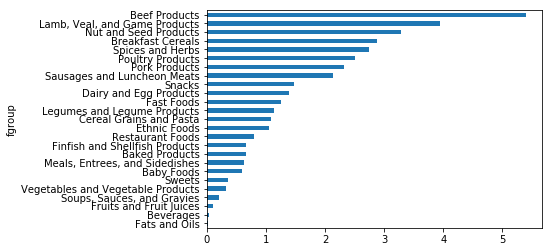

In [66]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [67]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [69]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

# Plotting and Visualization

In [70]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [78]:
%matplotlib inline
%pwd

'c:\\pydev\\pydata-book-master'

In [79]:
import matplotlib.pyplot as plt

## A briedf matplotlib API primer

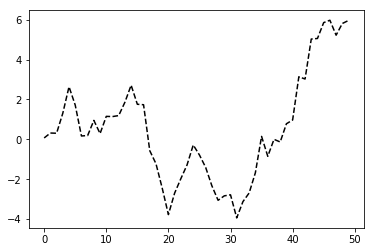

In [82]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

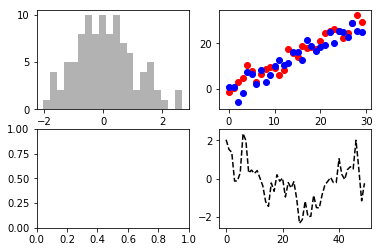

In [86]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plt.plot(randn(50).cumsum(), 'k--') # 마지막에 생성한 그래프에 작성
ax1.hist(randn(100), bins=20, color='k', alpha=0.3) # 지정한 그래프에 작성 
ax2.scatter(np.arange(30), np.arange(30)+ 3 * randn(30), color='r')
ax2.scatter(np.arange(30), np.arange(30)+ 3 * randn(30), color='b')


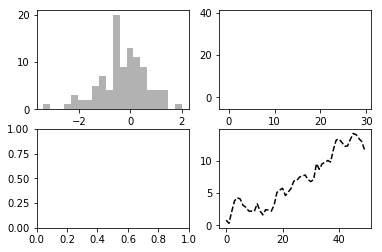

In [89]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plt.plot(randn(50).cumsum(), 'k--') # 마지막에 생성한 그래프에 작성
ax1.hist(randn(100), bins=20, color='k', alpha=0.3) # 지정한 그래프에 작성 
ax2.scatter(np.arange(30), np.arange(30)+ 3 * randn(30), color='r')
ax2.scatter(np.arange(30), np.arange(30)+ 3 * randn(30), color='b')

ax2.clear() # 2번째 그래프 삭제

In [91]:
import matplotlib
dir(matplotlib.style)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'available',
 'context',
 'core',
 'library',
 'reload_library',
 'use']

In [92]:
matplotlib.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

In [93]:
matplotlib.style.library

{'_classic_test': RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useof

In [94]:
matplotlib.style.library['ggplot']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.grid': True,
          'axes.labelcolor': '#555555',
          'axes.labelsize': 'large',
          'axes.linewidth': 1.0,
          'axes.prop_cycle': cycler('color', ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']),
          'axes.titlesize': 'x-large',
          'figure.edgecolor': '0.50',
          'figure.facecolor': 'white',
          'font.size': 10.0,
          'grid.color': 'white',
          'grid.linestyle': '-',
          'patch.antialiased': True,
          'patch.edgecolor': '#EEEEEE',
          'patch.facecolor': '#348ABD',
          'patch.linewidth': 0.5,
          'xtick.color': '#555555',
          'xtick.direction': 'out',
          'ytick.color': '#555555',
          'ytick.direction': 'out'})

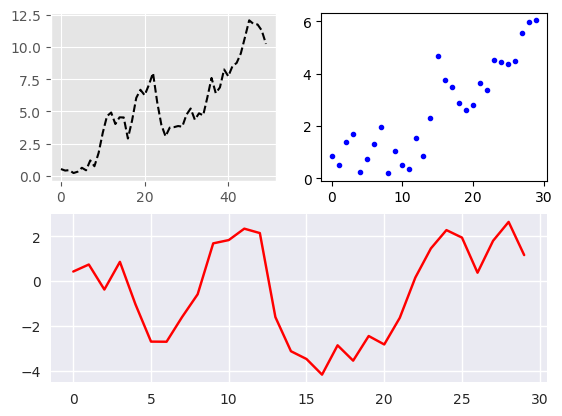

In [99]:
matplotlib.style.use('ggplot')
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(randn(50).cumsum(), 'k--') 

matplotlib.style.use('seaborn')
ax3 = fig.add_subplot(2, 1, 2)
ax3.plot(randn(30).cumsum(), 'r-') 

matplotlib.style.use('default')
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(randn(30).cumsum(), 'b.') 

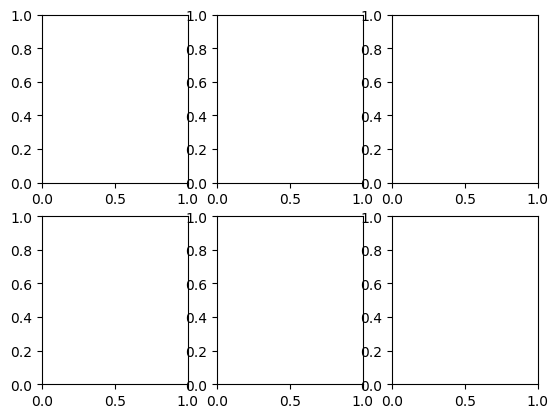

In [101]:
fig, axes = plt.subplots(2,3)

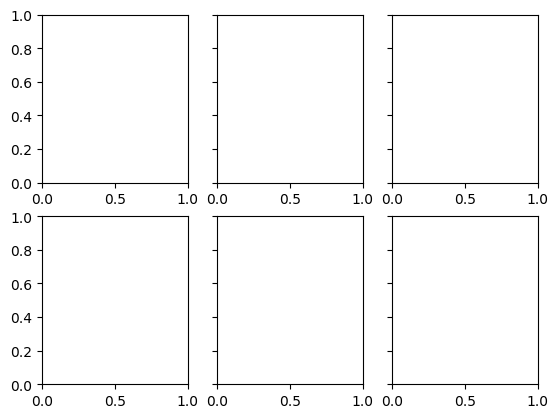

In [102]:
fig, axes = plt.subplots(2,3, sharey=True)

## Colors, markers, and line styoles

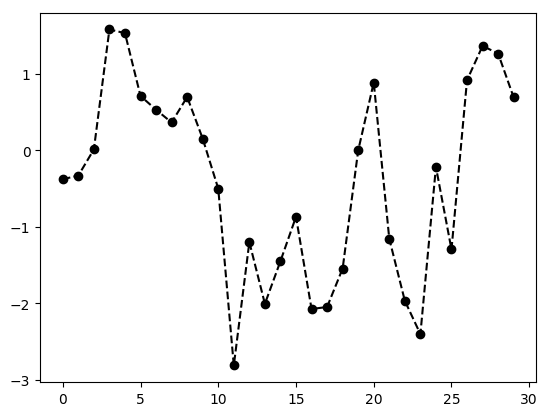

In [103]:
plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')

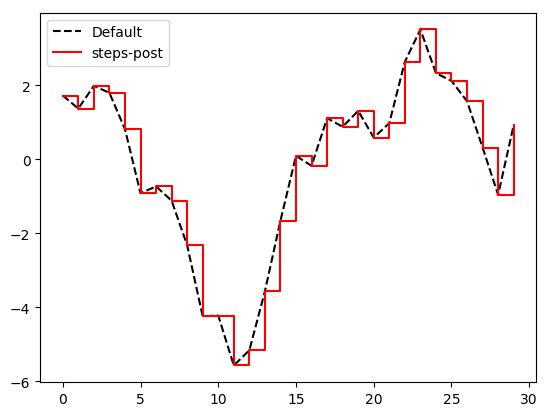

In [104]:
data = randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

##  Ticks, labels, and legends

### Setting the title, axis labels, ticks, and ticklabels

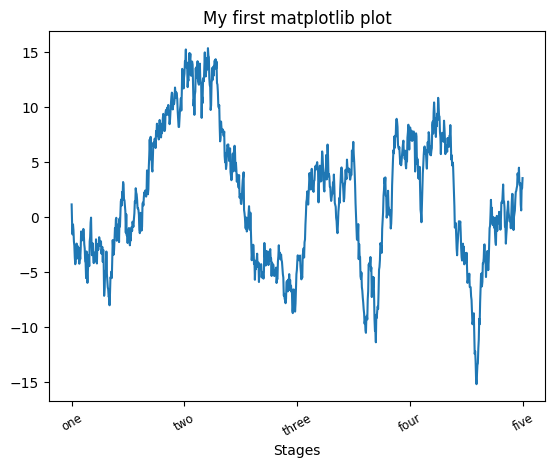

In [105]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### Adding legends

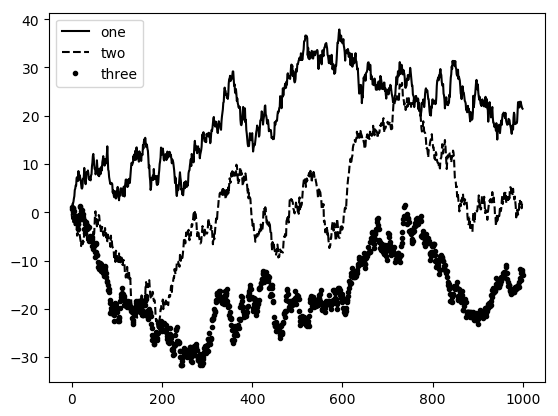

In [106]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

## Annotations and drawing on a subplot

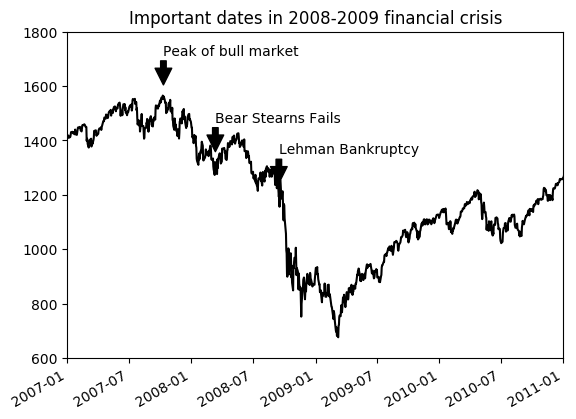

In [107]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')


ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

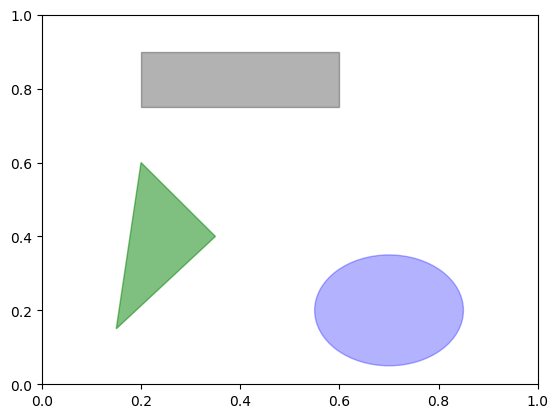

In [108]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

In [111]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

### matplotlib configuration

In [112]:
plt.rc('figure', figsize=(10, 10))

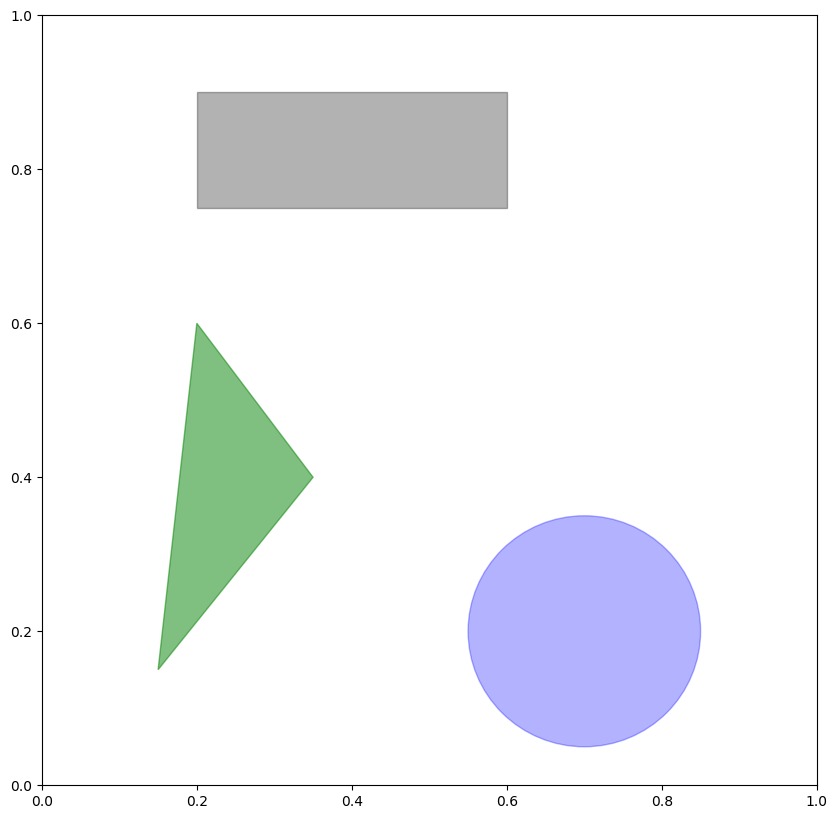

In [113]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Plotting functions in pandas

###  Line plots

In [124]:
plt.close('all')
plt.rc('figure', figsize=(7,4))

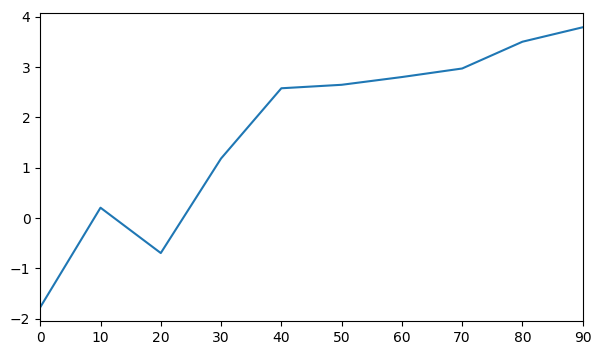

In [125]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

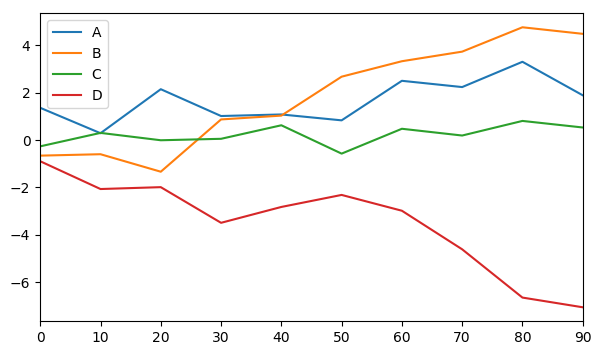

In [126]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### Bar plots

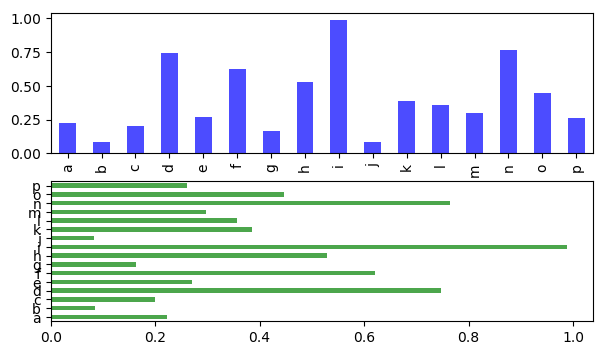

In [128]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='g', alpha=0.7)

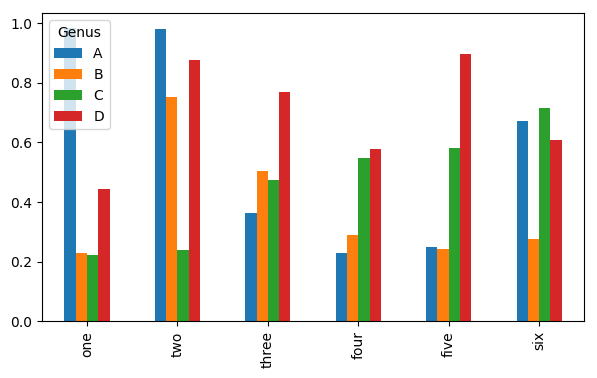

In [129]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

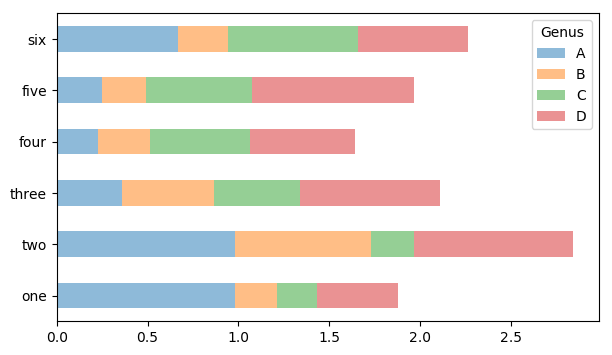

In [130]:
plt.figure()
df.plot(kind='barh', stacked=True, alpha=0.5)

In [135]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


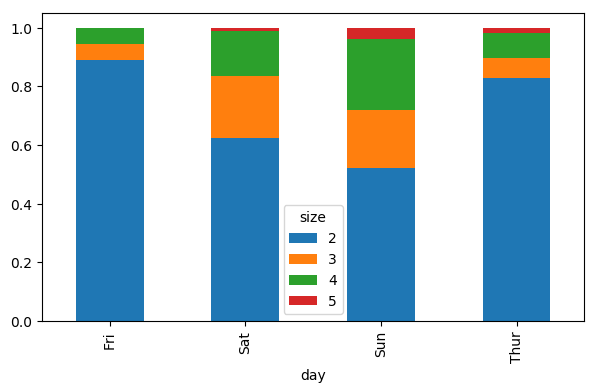

In [136]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

###  Histograms and density plots

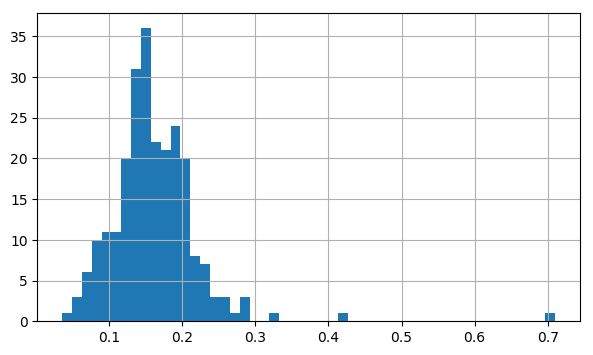

In [137]:
plt.figure()

tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

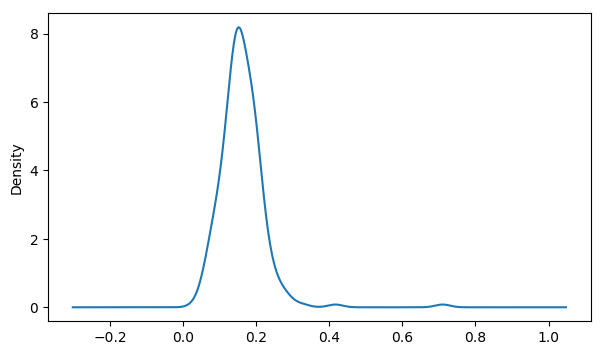

In [138]:
plt.figure()
tips['tip_pct'].plot(kind='kde')

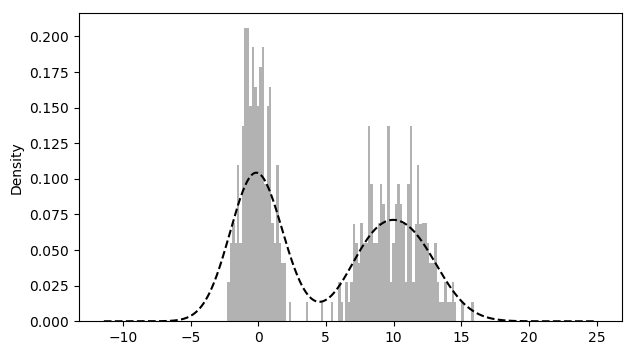

In [139]:
plt.figure()
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [140]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


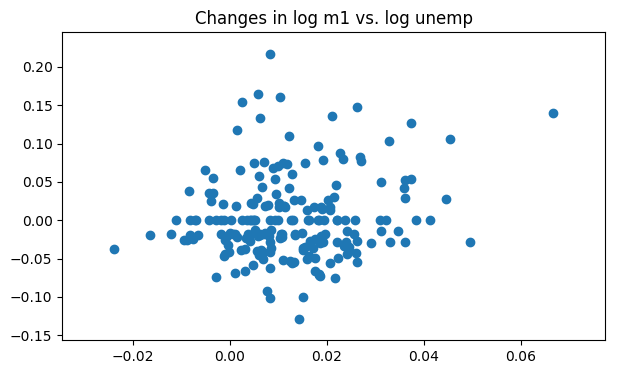

In [141]:
plt.figure()

plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))


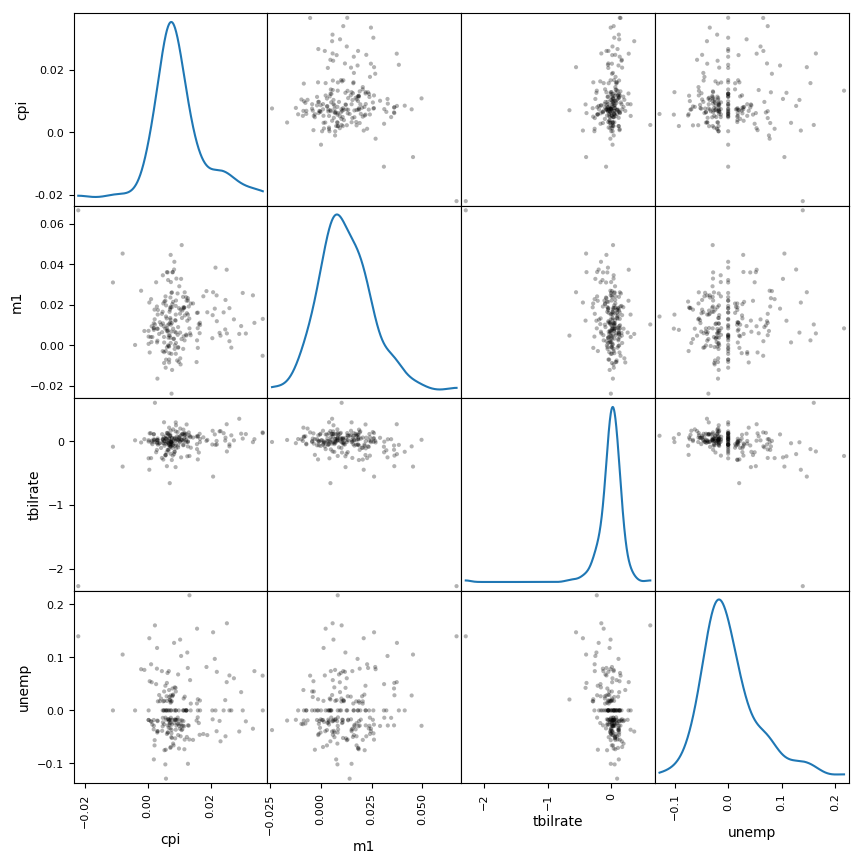

In [149]:
plt.rc('figure', figsize=(10, 10))
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3);